## This notebook connects to PPT1.2.pptx uploaded in the PPTs folder
### The required datafiles are uploaded in Data files folder

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#To read the files correctly, make sure it's present in the directory you are working in. Else modify the below lines of code by entering the location of file stored in your computer
df = pd.DataFrame(pd.read_csv("3 hr bearing jam good motor good oil @10bar.csv")) #pd.DataFrame(pd.read_csv('Location of file\name of file'))
df1= pd.DataFrame(pd.read_csv("3hr good motor good oil @10 bar.csv"))
df2=pd.DataFrame(pd.read_csv("Broken bearing with continuous actuation 1hr data @10bar.csv"))
df3= pd.DataFrame(pd.read_csv("Manipulated Dataset.csv"))
print(type(df))
df=df.fillna(0)
df.head()

<class 'pandas.core.frame.DataFrame'>


,X_Value,Vibration,X_Value.1,Motor power,Comment
0,0.00,0.961583,0.00,-0.014677,0.0
1,0.01,0.961254,0.01,-0.008759,0.0
2,0.02,0.958952,0.02,-0.008101,0.0
3,0.03,0.953362,0.03,-0.007772,0.0
4,0.04,0.958295,0.04,-0.010403,0.0


In [ ]:
import scipy.fft
t=df[df.columns[0]][:309699]
t.values
vibdf=df[df.columns[1]][:309699]
vibdf1=df1[df1.columns[1]][:309699]
vibdf2=df2[df2.columns[1]][:309699]
vibdf3=df3[df3.columns[1]][:309699]
print(len(vibdf))
print(len(vibdf1))
print(len(vibdf3))
t=t[:309699]
print(t[309698])
print(len(t))


309699
309699
309699
3096.98
309699


0      0.961583
1      0.961254
2      0.958952
3      0.953362
4      0.958295
         ...   
195    0.953362
196    0.955335
197    0.955007
198    0.961583
199    0.972105
Name: Vibration, Length: 200, dtype: float64

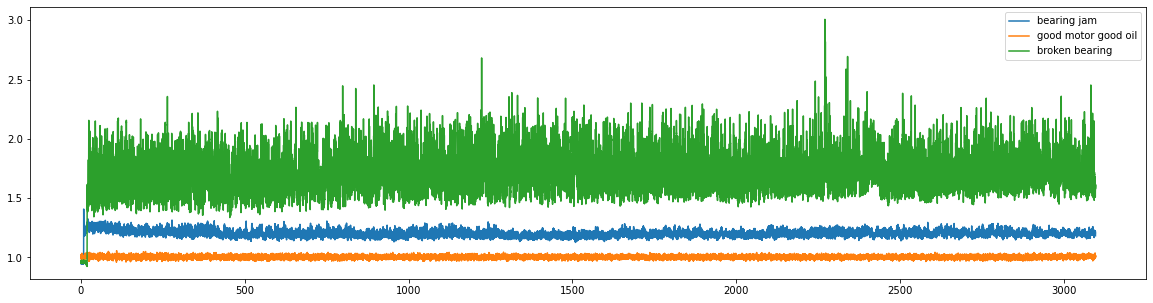

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(t,vibdf,label="bearing jam")
plt.plot(t,vibdf1,label="good motor good oil")
plt.plot(t,vibdf2,label="broken bearing")
plt.legend(loc="best")
vibdf.head(200)

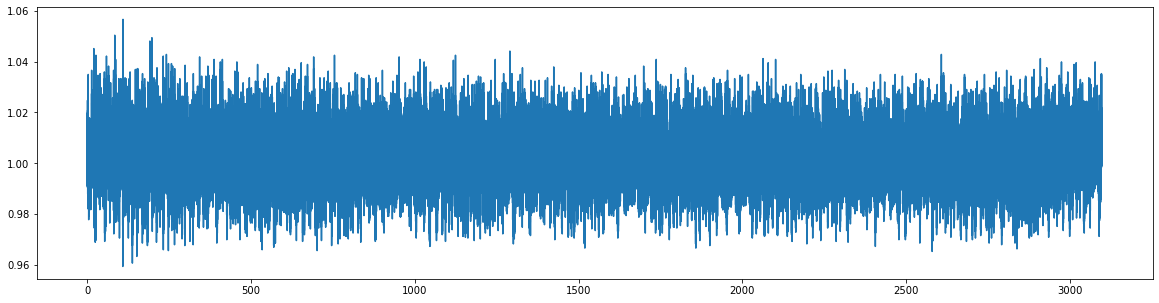

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(t,vibdf1)

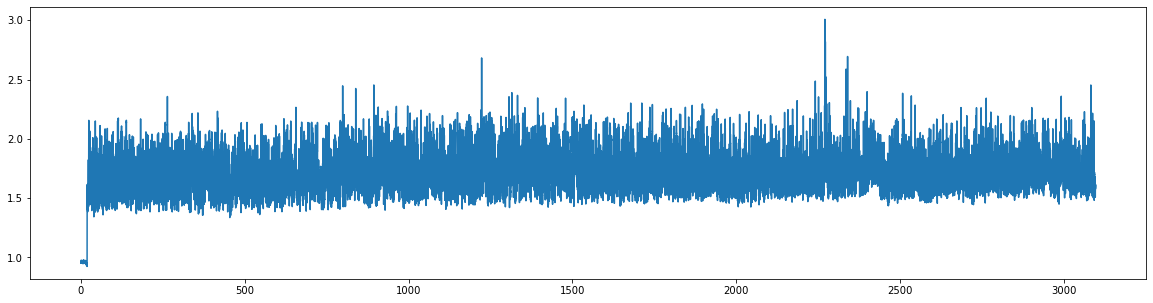

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(t,vibdf2)

0      1.007289
1      1.001370
2      1.017811
3      1.006631
4      1.006631
         ...   
195    0.982956
196    1.006960
197    0.992821
198    0.995122
199    1.003672
Name: 1.024058, Length: 200, dtype: float64

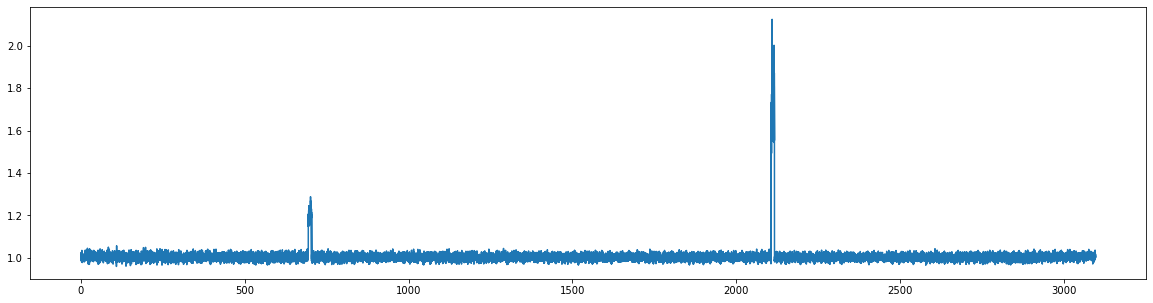

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(t,vibdf3)
vibdf3.head(200)

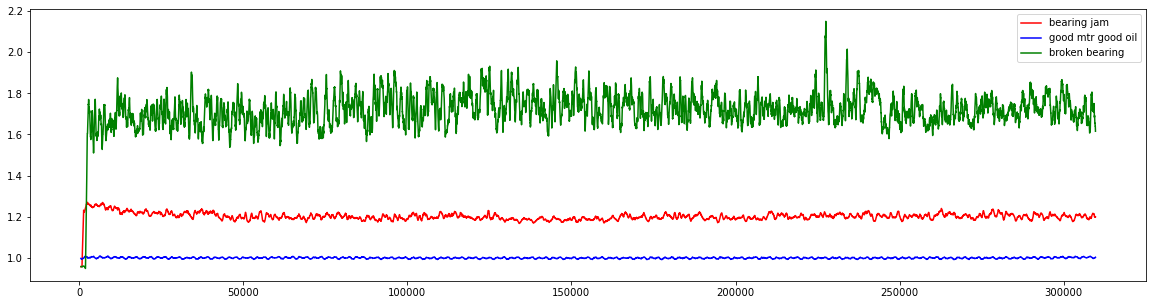

In [ ]:
rolling_mean = vibdf.rolling(500).mean()
rolling_mean1 = vibdf1.rolling(500).mean()
rolling_mean2 = vibdf2.rolling(500).mean()
#rolling_mean3 = vibdf3.rolling(100).mean()
plt.figure(figsize=(20,5))
plt.plot(rolling_mean, color="red",label="bearing jam")
plt.plot(rolling_mean1, color="blue",label="good mtr good oil")
plt.plot(rolling_mean2, color="green",label="broken bearing")
#plt.plot(rolling_mean3, color="black",label="mixed dataset")
plt.legend(loc="best")


In [ ]:
#from statsmodels.tsa.stattools import adfuller
#adft = adfuller(vibdf,autolag="AIC")

In [ ]:
#output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                   #     "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
#print(output_df)

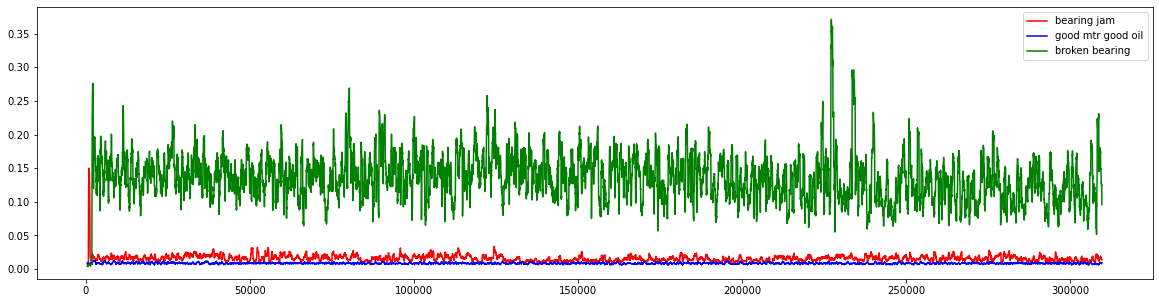

In [ ]:
rolling_std = vibdf.rolling(500).std()
rolling_std1 = vibdf1.rolling(500).std()
rolling_std2 = vibdf2.rolling(500).std()
plt.figure(figsize=(20,5))
plt.plot(rolling_std, color="red",label="bearing jam")
plt.plot(rolling_std1, color="blue",label="good mtr good oil")
plt.plot(rolling_std2, color="green",label="broken bearing")
plt.legend(loc="best")

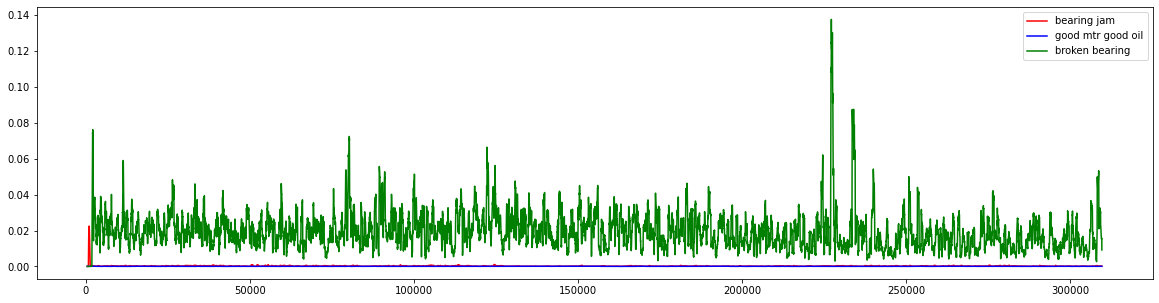

In [ ]:
rolling_var = vibdf.rolling(500).var()
rolling_var1 = vibdf1.rolling(500).var()
rolling_var2 = vibdf2.rolling(500).var()
#print(rolling_var2[5000:10000])
plt.figure(figsize=(20,5))
plt.plot(rolling_var, color="red",label="bearing jam")
plt.plot(rolling_var1, color="blue",label="good mtr good oil")
plt.plot(rolling_var2, color="green",label="broken bearing")
plt.legend(loc="best")

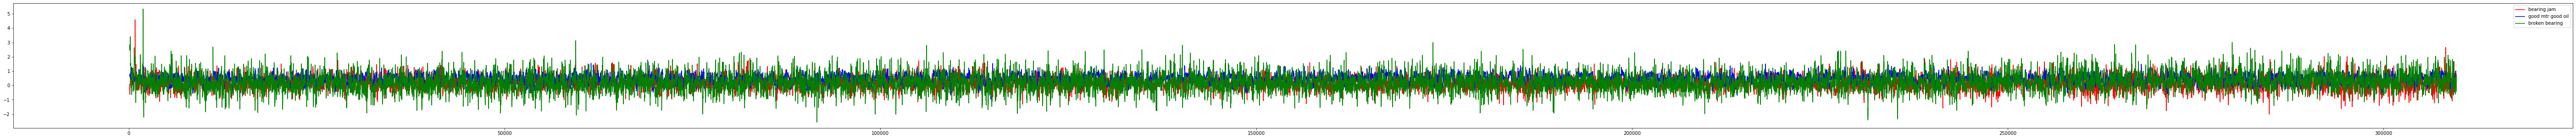

In [ ]:
rolling_skew = vibdf.rolling(100).skew()
rolling_skew1 = vibdf1.rolling(100).skew()
rolling_skew2 = vibdf2.rolling(100).skew()
plt.figure(figsize=(100,5))
plt.plot(rolling_skew, color="red",label="bearing jam")
plt.plot(rolling_skew1, color="blue",label="good mtr good oil")
plt.plot(rolling_skew2, color="green",label="broken bearing")
plt.legend(loc="best")

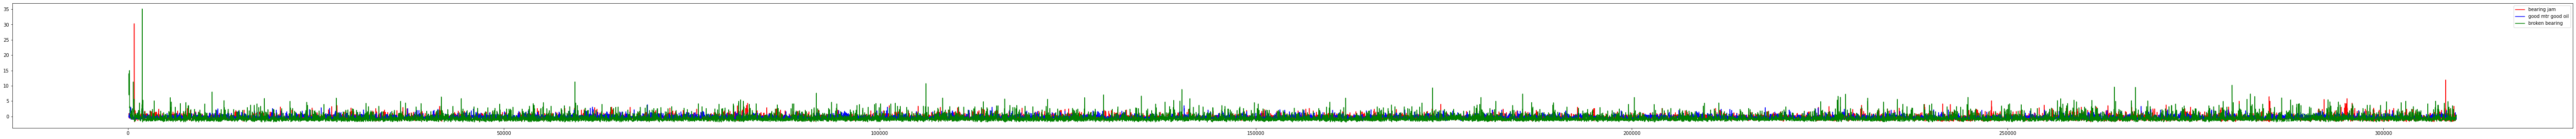

In [ ]:
rolling_kurt = vibdf.rolling(100).kurt()
rolling_kurt1 = vibdf1.rolling(100).kurt()
rolling_kurt2 = vibdf2.rolling(100).kurt()
plt.figure(figsize=(100,5))
plt.plot(rolling_kurt, color="red",label="bearing jam")
plt.plot(rolling_kurt1, color="blue",label="good mtr good oil")
plt.plot(rolling_kurt2, color="green",label="broken bearing")
plt.legend(loc="best")

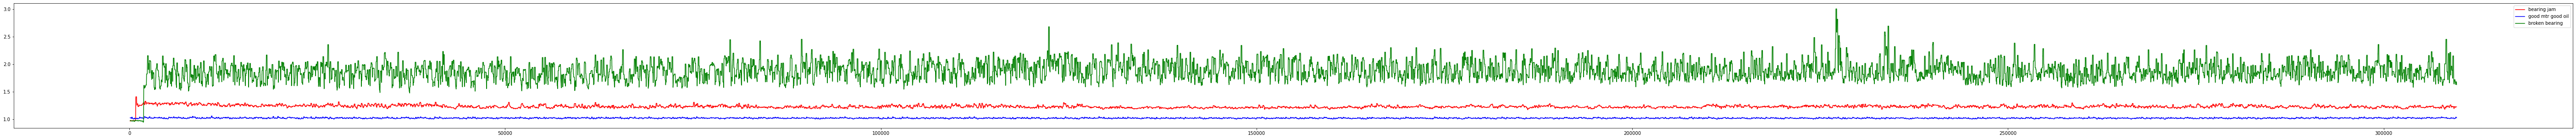

In [ ]:
rolling_max = vibdf.rolling(100).max()
rolling_max1 = vibdf1.rolling(100).max()
rolling_max2 = vibdf2.rolling(100).max()
plt.figure(figsize=(100,5))
plt.plot(rolling_max, color="red",label="bearing jam")
plt.plot(rolling_max1, color="blue",label="good mtr good oil")
plt.plot(rolling_max2, color="green",label="broken bearing")
plt.legend(loc="best")

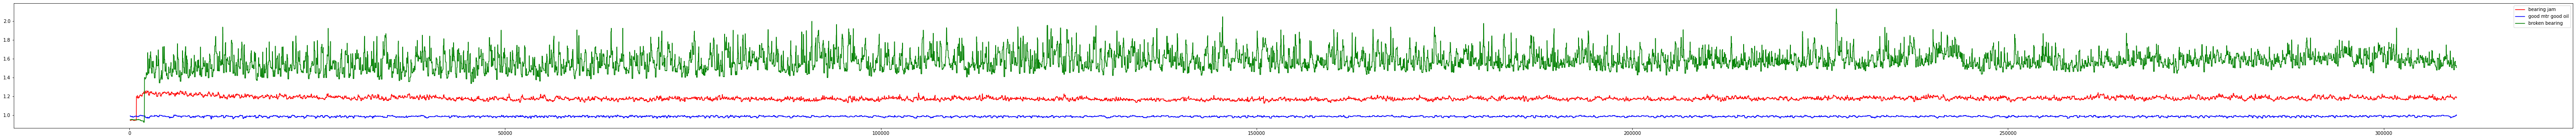

In [ ]:
rolling_min = vibdf.rolling(100).min()
rolling_min1 = vibdf1.rolling(100).min()
rolling_min2 = vibdf2.rolling(100).min()
plt.figure(figsize=(100,5))
plt.plot(rolling_min, color="red",label="bearing jam")
plt.plot(rolling_min1, color="blue",label="good mtr good oil")
plt.plot(rolling_min2, color="green",label="broken bearing")
plt.legend(loc="best")

In [ ]:
import scipy 
from scipy import signal
from scipy.fft import fftshift

In [ ]:
pip install git+https://github.com/aaren/wavelets

  Cloning https://github.com/aaren/wavelets to c:\users\ayushman\appdata\local\temp\pip-req-build-syfs0rkh
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/aaren/wavelets 'C:\Users\AYUSHMAN\AppData\Local\Temp\pip-req-build-syfs0rkh'


In [ ]:
type(vibdf)
vibdfa=vibdf.to_numpy()
print(type(vibdfa))
print(type(vibdf))
vibdfa1=vibdf1.to_numpy()
vibdfa2=vibdf2.to_numpy()
vibdfa.shape

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


(309699,)

In [ ]:
pip install PyWavelets


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pywt
pywt.wavelist(family=None, kind='all')



['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [ ]:
(cA, cD) = pywt.dwt(vibdfa, 'db1')
print(len(cA))
print(len(cD))
print(cA)
print(cD)


154850
154850
[1.35965108 1.3522102  1.35965108 ... 1.67772398 1.67772398 1.67191156]
[ 0.00023264  0.00395273 -0.0044173  ... -0.00581242 -0.00302217
  0.        ]


In [ ]:
pip install ssqueezepy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ssqueezepy import ssq_cwt, ssq_stft

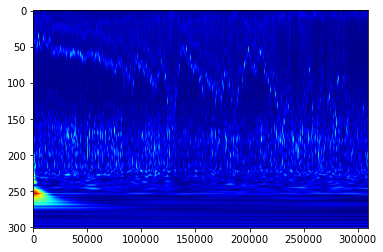

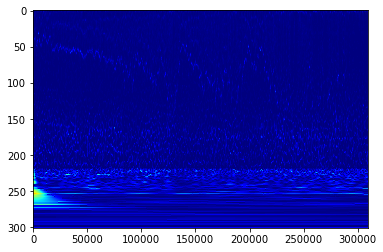

In [ ]:
def viz(x, Tx, Wx):
    plt.imshow(np.abs(Wx), aspect='auto', cmap='jet')
    plt.show()
    plt.imshow(np.abs(Tx), aspect='auto', cmap='jet')
    plt.show()

Twxo, Wxo, *_ = ssq_cwt(vibdfa)
viz(vibdfa, Twxo, Wxo)

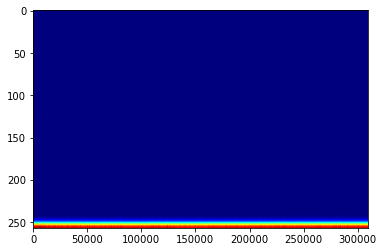

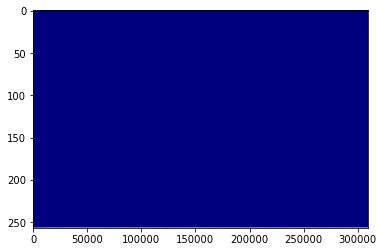

In [ ]:
Tsxo, Sxo, *_ = ssq_stft(vibdfa)
viz(vibdfa, np.flipud(Tsxo), np.flipud(Sxo))

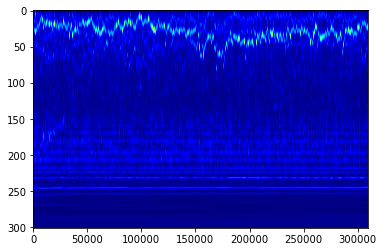

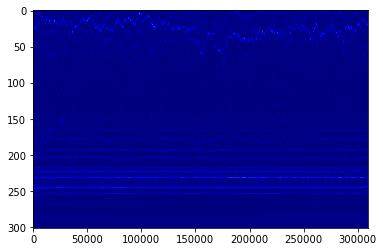

In [ ]:
Twx1, Wx1, *_ = ssq_cwt(vibdfa1)
viz(vibdfa1, Twx1, Wx1)

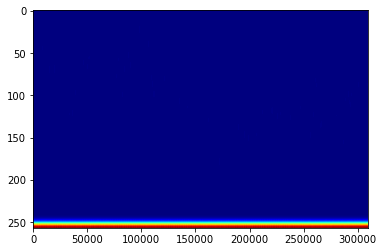

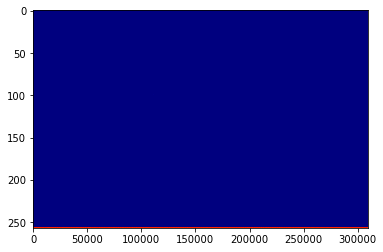

In [ ]:
Tsx1, Sx1, *_ = ssq_stft(vibdfa1)
viz(vibdfa1, np.flipud(Tsx1), np.flipud(Sx1))

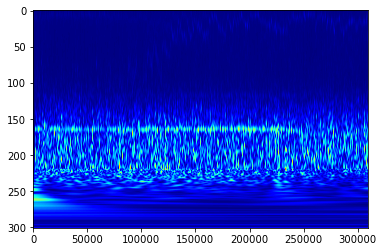

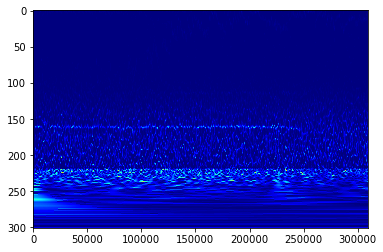

In [ ]:
Twx2, Wx2, *_ = ssq_cwt(vibdfa2)
viz(vibdfa2, Twx2, Wx2)

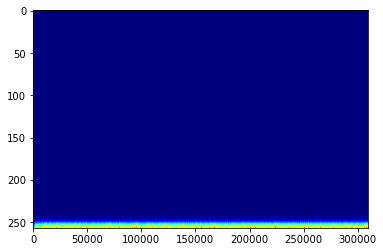

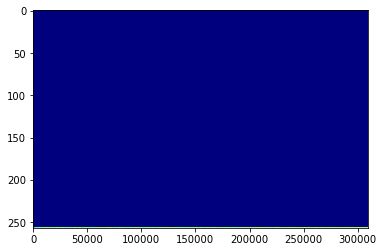

In [ ]:
Tsx2, Sx2, *_ = ssq_stft(vibdfa2)
viz(vibdfa2, np.flipud(Tsx2), np.flipud(Sx2))